Exploratory Data Analysis

In [1]:
import pymysql

# Database credentials
conn = pymysql.connect(
    host="18.136.157.135",
    port=3306,  # Default MySQL port
    user="dm_usdata_sql",
    password="37z<49REb&mKnl4AV!vJ",
    database="project_service_data"
)

print("✅ Connected to MySQL!")
conn.close()

✅ Connected to MySQL!


In [2]:
import pymysql
import pandas as pd

# Connect to MySQL
conn = pymysql.connect(
    host="18.136.157.135",
    port=3306,
    user="dm_usdata_sql",
    password="37z<49REb&mKnl4AV!vJ",
    database="project_service_data"
)

# Fetch data directly from MySQL
query = "SELECT * FROM service_data;"
df = pd.read_sql(query, conn)

# Close connection
conn.close()

# Display first few rows
print(df.head())

C:\Users\swaya\AppData\Local\Temp\ipykernel_17272\1784376914.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


  invoice_date job_card_date business_partner_name  vehicle_no  \
0     30-05-17      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
4     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   

              vehicle_model current_km_reading invoice_line_text  
0  BAJAJ AVENGER STREET 220              50000        ENGINE OIL  
1       BAJAJ PULSAR NS 200                758        ENGINE OIL  
2       BAJAJ PULSAR NS 200                758            POLISH  
3       BAJAJ PULSAR NS 200                758       CONSUMABLES  
4       BAJAJ PULSAR NS 200                758       COOLANT OIL  


In [3]:
df.to_csv("inventory_data_backup.csv", index=False)


In [4]:
df = pd.read_csv("inventory_data_backup.csv")

In [5]:
import pandas as pd

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 invoice_date              0
job_card_date             0
business_partner_name     0
vehicle_no                0
vehicle_model             0
current_km_reading        0
invoice_line_text        34
dtype: int64


In [6]:
print(df[df['invoice_line_text'].isnull()])

      invoice_date job_card_date business_partner_name  vehicle_no  \
545       16-06-17      13-06-17        diliXXXXXXXXXX  KA53S3XXXX   
632       15-06-17      14-06-17        naveXXXXXXXXXX  KA53W3XXXX   
635       15-06-17      14-06-17        naveXXXXXXXXXX  KA53W3XXXX   
661       15-06-17      14-06-17        kailXXXXXXXXXX  KA01HNXXXX   
769       16-06-17      16-06-17        hariXXXXXXXXXX  KA53ESXXXX   
2139      21-07-17      21-07-17        diliXXXXXXXXXX  KA53S3XXXX   
2579      01-08-17      01-08-17        hariXXXXXXXXXX  KA53EQXXXX   
2613      03-08-17      03-08-17        diliXXXXXXXXXX  KA53S3XXXX   
10809     27-02-18      27-02-18        PRAVXXXXXXXXXX  KA04JBXXXX   
10810     27-02-18      27-02-18        PRAVXXXXXXXXXX  KA04JBXXXX   
10811     27-02-18      27-02-18        PRAVXXXXXXXXXX  KA04JBXXXX   
10812     27-02-18      27-02-18        PRAVXXXXXXXXXX  KA04JBXXXX   
10813     27-02-18      27-02-18        PRAVXXXXXXXXXX  KA04JBXXXX   
10814     27-02-18  

In [7]:
df['invoice_line_text'] = df['invoice_line_text'].fillna("Unknown")

In [8]:
df.loc[:, 'invoice_line_text'] = df['invoice_line_text'].fillna("Unknown")

In [9]:
import pandas as pd

# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 invoice_date             0
job_card_date            0
business_partner_name    0
vehicle_no               0
vehicle_model            0
current_km_reading       0
invoice_line_text        0
dtype: int64


In [10]:
df = df.drop_duplicates()
print("Duplicates removed!")

Duplicates removed!


In [11]:
print(df.describe())
print(df.info())

       current_km_reading
count        28099.000000
mean         19341.240115
std          25333.768219
min              0.000000
25%           3959.000000
50%          12347.000000
75%          27906.000000
max         610112.000000
<class 'pandas.core.frame.DataFrame'>
Index: 28099 entries, 0 to 28481
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   invoice_date           28099 non-null  object
 1   job_card_date          28099 non-null  object
 2   business_partner_name  28099 non-null  object
 3   vehicle_no             28099 non-null  object
 4   vehicle_model          28099 non-null  object
 5   current_km_reading     28099 non-null  int64 
 6   invoice_line_text      28099 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB
None


In [12]:
df['invoice_line_text'].value_counts().head(10)

invoice_line_text
ENGINE OIL           3780
CHAIN LUBRICATION    3417
GENERAL SERVICE      2132
AIR FILTER           1698
3M OIL               1615
CONSUMABLES          1582
POLISH               1236
DISC OIL              985
BRAKE SHOE            861
OIL FILTER            814
Name: count, dtype: int64

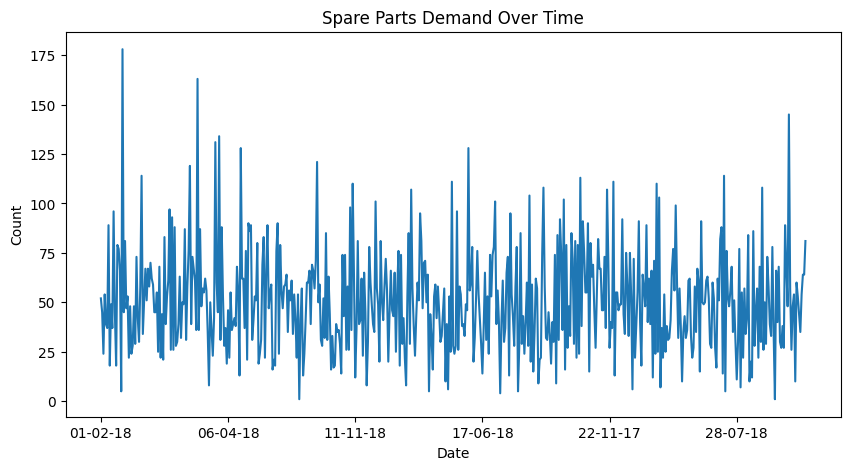

In [13]:
import matplotlib.pyplot as plt  

df.groupby('invoice_date').size().plot(title="Spare Parts Demand Over Time", figsize=(10,5))  
plt.xlabel("Date")  
plt.ylabel("Count")  
plt.show()

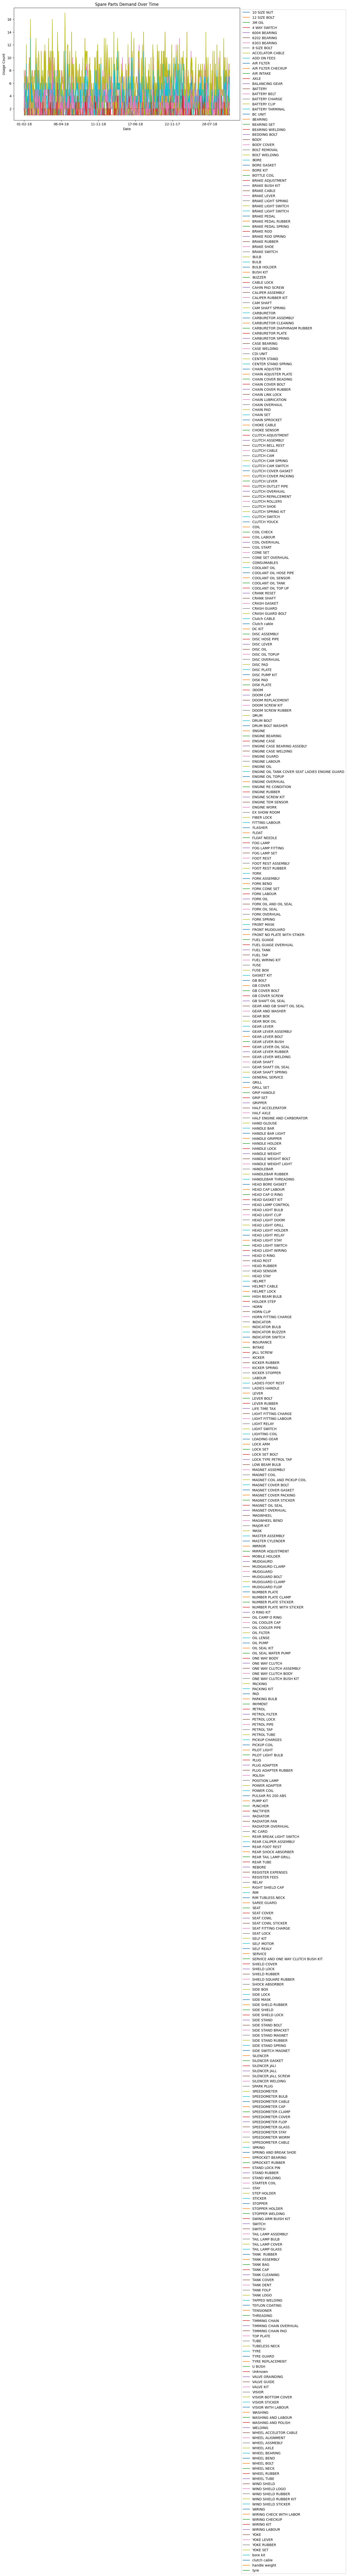

In [14]:
import matplotlib.pyplot as plt

df.groupby(['invoice_date', 'invoice_line_text']).size().unstack().plot(figsize=(12,6))
plt.title("Spare Parts Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Usage Count")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [15]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

C:\Users\swaya\AppData\Local\Temp\ipykernel_17272\45230595.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')


In [16]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])  # Convert to datetime
df.set_index('invoice_date', inplace=True)  # Set date as index
monthly_demand = df.resample('M').size()  # Aggregate monthly demand

C:\Users\swaya\AppData\Local\Temp\ipykernel_17272\197218166.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df.resample('M').size()  # Aggregate monthly demand


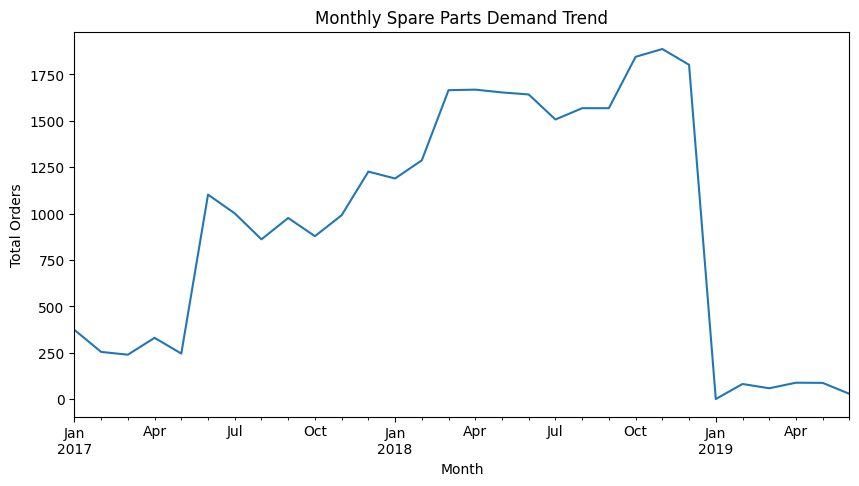

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly_demand.plot(title="Monthly Spare Parts Demand Trend")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(monthly_demand, order=(5,1,0))  # (p,d,q) params can be tuned
model_fit = model.fit()

# Predict next 6 months
forecast = model_fit.forecast(steps=6)
print(forecast)

ModuleNotFoundError: No module named 'statsmodels'

NameError: name 'forecast' is not defined

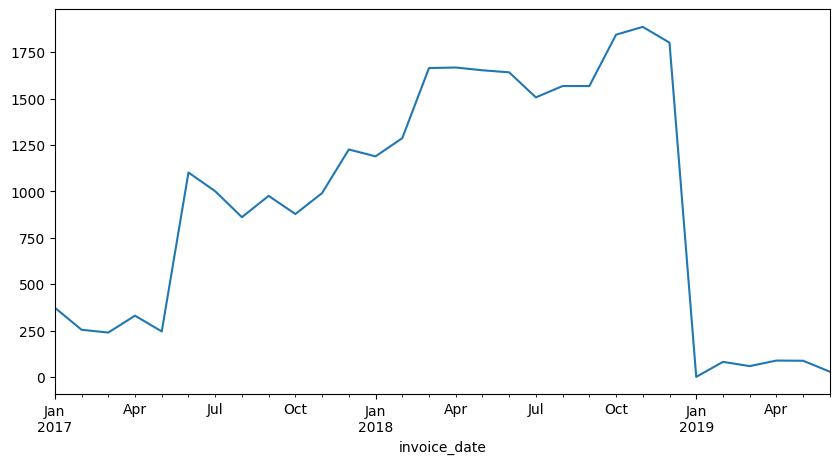

In [19]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(10,5))
monthly_demand.plot(label="Actual Demand")  
forecast.plot(label="Forecasted Demand", linestyle="dashed")  
plt.title("Inventory Forecast for Next 6 Months")  
plt.legend()
plt.show()

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(monthly_demand, order=(5,1,0), seasonal_order=(1,1,1,12))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
print(forecast)

ModuleNotFoundError: No module named 'statsmodels'

In [21]:
print(monthly_demand.describe())

count      30.000000
mean      936.633333
std       663.247054
min         0.000000
25%       247.250000
50%       996.000000
75%      1568.000000
max      1887.000000
dtype: float64


In [22]:
from sklearn.preprocessing import MinMaxScaler  

scaler = MinMaxScaler()
monthly_demand_scaled = scaler.fit_transform(monthly_demand.values.reshape(-1, 1))

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

plot_acf(monthly_demand)
plot_pacf(monthly_demand)
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  

model = SARIMAX(monthly_demand, order=(2,1,2), seasonal_order=(1,1,1,12))  
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
print(forecast)

ModuleNotFoundError: No module named 'statsmodels'

In [25]:
print(monthly_demand.describe())

count      30.000000
mean      936.633333
std       663.247054
min         0.000000
25%       247.250000
50%       996.000000
75%      1568.000000
max      1887.000000
dtype: float64


In [26]:
from sklearn.preprocessing import MinMaxScaler  

scaler = MinMaxScaler()
monthly_demand_scaled = scaler.fit_transform(monthly_demand.values.reshape(-1,1))

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  

model = SARIMAX(monthly_demand, order=(2,1,2), seasonal_order=(1,1,1,12))  
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
print(forecast)

ModuleNotFoundError: No module named 'statsmodels'

NameError: name 'forecast' is not defined

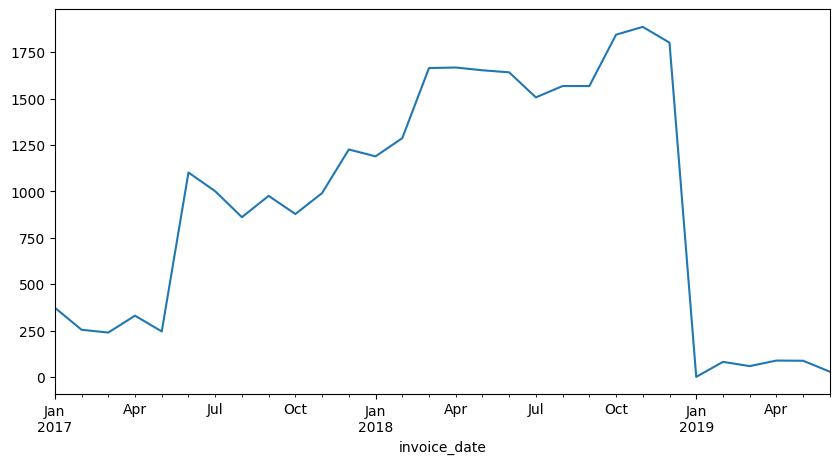

In [28]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(10,5))
monthly_demand.plot(label="Actual Demand")  
forecast.plot(label="Forecasted Demand", linestyle="dashed")  
plt.title("Inventory Forecast (Refined Model)")  
plt.legend()
plt.show()

In [29]:
print(monthly_demand.describe())

count      30.000000
mean      936.633333
std       663.247054
min         0.000000
25%       247.250000
50%       996.000000
75%      1568.000000
max      1887.000000
dtype: float64


In [30]:
from sklearn.preprocessing import MinMaxScaler  

scaler = MinMaxScaler()
monthly_demand_scaled = scaler.fit_transform(monthly_demand.values.reshape(-1,1))

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  

model = SARIMAX(monthly_demand, order=(2,1,2), seasonal_order=(1,1,1,12))  
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
print(forecast)

ModuleNotFoundError: No module named 'statsmodels'

In [32]:
print(monthly_demand.index.min(), monthly_demand.index.max())  # Check range

2017-01-31 00:00:00 2019-06-30 00:00:00


In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX  

model = SARIMAX(monthly_demand, order=(2,1,2), seasonal_order=(0,1,0,12))  
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
print(forecast)

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
!pip install cmdstanpy prophet

In [ ]:
!pip install --no-cache-dir prophet

In [1]:
!pip list | grep prophet

prophet                   1.1.6


In [2]:
from prophet import Prophet
print("✅ Prophet is working inside Jupyter Notebook!")

✅ Prophet is working inside Jupyter Notebook!


In [ ]:
!pip install --upgrade jupyter ipywidgets

In [3]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("S:/intership/inventory_forecasting_project/data/inventory_data_backup.csv")
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format="%Y-%m-%d", errors="coerce")
df.dropna(subset=['invoice_date'], inplace=True)
df.set_index('invoice_date', inplace=True)

# Aggregate monthly demand
monthly_demand = df.resample('ME').size()

# Prepare data for Prophet
df_prophet = monthly_demand.reset_index()
df_prophet.columns = ['ds', 'y']

# Train model
model = Prophet()
model.fit(df_prophet)

# Predict next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

ValueError: Dataframe has less than 2 non-NaN rows.

In [4]:
print(df_prophet.isna().sum())

ds    0
y     0
dtype: int64


In [5]:
print(df_prophet.shape)

(0, 2)


In [6]:
print(monthly_demand.head())
print(monthly_demand.shape)

Series([], Freq: ME, dtype: int64)
(0,)


In [7]:
print(df.head())  # Check if data is loaded correctly
print(df.shape)   # Verify number of rows
print(df.columns) # Ensure 'invoice_date' is present

Empty DataFrame
Columns: [job_card_date, business_partner_name, vehicle_no, vehicle_model, current_km_reading, invoice_line_text]
Index: []
(0, 6)
Index(['job_card_date', 'business_partner_name', 'vehicle_no', 'vehicle_model',
       'current_km_reading', 'invoice_line_text'],
      dtype='object')


In [8]:
with open("S:/intership/inventory_forecasting_project/data/inventory_data_backup.csv", "r") as f:
    print(f.readlines()[:10])  # Show first 10 lines

['invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text\n', '30-05-17,30-05-17,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL\n', '02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL\n', '02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH\n', '02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES\n', '02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL\n', '02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CHAIN LUBRICATION\n', '02-06-17,31-05-17,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,4 WAY SWITCH\n', '31-05-17,31-05-17,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717,ENGINE OIL\n', '31-05-17,31-05-17,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717,3M OIL\n']


In [9]:
df = pd.read_csv("S:/intership/inventory_forecasting_project/data/inventory_data_backup.csv")

# Convert 'invoice_date' to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format="%d-%m-%y", errors="coerce")

# Drop rows with invalid dates
df.dropna(subset=['invoice_date'], inplace=True)

print(df.head())  # Verify the date column is properly formatted

  invoice_date job_card_date business_partner_name  vehicle_no  \
0   2017-05-30      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1   2017-06-02      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2   2017-06-02      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3   2017-06-02      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
4   2017-06-02      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   

              vehicle_model  current_km_reading invoice_line_text  
0  BAJAJ AVENGER STREET 220               50000        ENGINE OIL  
1       BAJAJ PULSAR NS 200                 758        ENGINE OIL  
2       BAJAJ PULSAR NS 200                 758            POLISH  
3       BAJAJ PULSAR NS 200                 758       CONSUMABLES  
4       BAJAJ PULSAR NS 200                 758       COOLANT OIL  


In [10]:
df.rename(columns={'invoice_date': 'ds'}, inplace=True)

In [11]:
monthly_demand = df.resample('ME', on='ds').size().reset_index()
monthly_demand.columns = ['ds', 'y']  # Prophet requires 'y' as the target variable

print(monthly_demand.head())  # Verify formatting

          ds     y
0 2017-05-31    11
1 2017-06-30  1346
2 2017-07-31  1178
3 2017-08-31   973
4 2017-09-30  1264


14:12:06 - cmdstanpy - INFO - Chain [1] start processing
14:12:06 - cmdstanpy - INFO - Chain [1] done processing
S:\intership\inventory_forecasting_project\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


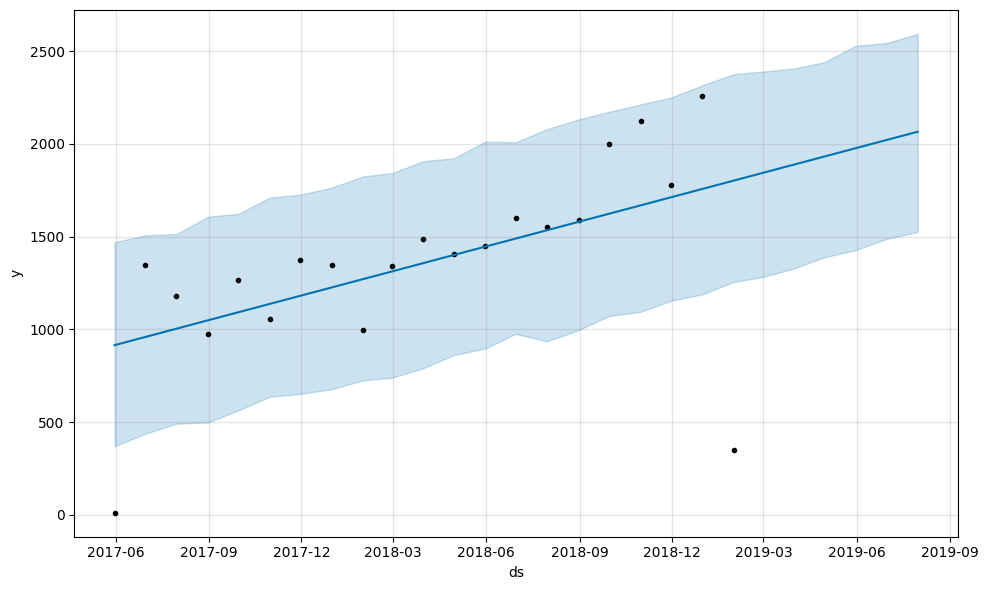

In [12]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Initialize and fit Prophet model
model = Prophet()
model.fit(monthly_demand)

# Predict next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

In [13]:
import pandas as pd

# Merge actual & predicted values
forecast_actuals = pd.merge(monthly_demand, forecast[['ds', 'yhat']], on='ds', how='left')

print(forecast_actuals.head())  # View predicted vs actual demand

          ds     y         yhat
0 2017-05-31    11   914.617480
1 2017-06-30  1346   958.254671
2 2017-07-31  1178  1003.346435
3 2017-08-31   973  1048.438200
4 2017-09-30  1264  1092.075391


In [14]:
model = Prophet(
    seasonality_mode='multiplicative',  # Improves predictions with strong seasonal patterns
    yearly_seasonality=True,  # Enables yearly trends
    weekly_seasonality=False,  # Disable weekly trends (not useful for monthly demand)
    changepoint_prior_scale=0.05  # Adjust flexibility for trend changes
)
model.fit(monthly_demand)

14:12:17 - cmdstanpy - INFO - Chain [1] start processing
14:12:29 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
model = Prophet(
    seasonality_mode='multiplicative',  # Improves predictions with strong seasonal patterns
    yearly_seasonality=True,  # Enables yearly trends
    weekly_seasonality=False,  # Disable weekly trends (not useful for monthly demand)
    changepoint_prior_scale=0.05  # Adjust flexibility for trend changes
)
model.fit(monthly_demand)

14:12:29 - cmdstanpy - INFO - Chain [1] start processing
14:12:43 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
from sklearn.metrics import mean_absolute_error

# Calculate error
mae = mean_absolute_error(forecast_actuals['y'], forecast_actuals['yhat'])
print(f"📊 Mean Absolute Error: {mae:.2f}")

📊 Mean Absolute Error: 263.99


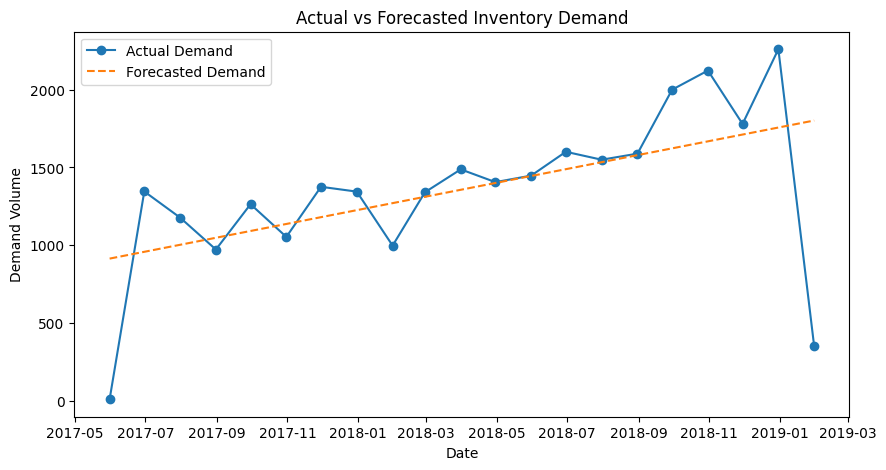

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(forecast_actuals['ds'], forecast_actuals['y'], label="Actual Demand", marker="o")
plt.plot(forecast_actuals['ds'], forecast_actuals['yhat'], label="Forecasted Demand", linestyle="dashed")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Demand Volume")
plt.title("Actual vs Forecasted Inventory Demand")
plt.show()

In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv("S:/intership/inventory_forecasting_project/data/inventory_data_backup.csv")

print(df.head())  # Check if data is loaded correctly
print(df.shape)   # Verify the number of rows
print(df.columns) # Ensure correct column names

  invoice_date job_card_date business_partner_name  vehicle_no  \
0     30-05-17      30-05-17        shivXXXXXXXXXX  KA03MFXXXX   
1     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
2     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
3     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   
4     02-06-17      31-05-17        KIRAXXXXXXXXXX  KA53ESXXXX   

              vehicle_model  current_km_reading invoice_line_text  
0  BAJAJ AVENGER STREET 220               50000        ENGINE OIL  
1       BAJAJ PULSAR NS 200                 758        ENGINE OIL  
2       BAJAJ PULSAR NS 200                 758            POLISH  
3       BAJAJ PULSAR NS 200                 758       CONSUMABLES  
4       BAJAJ PULSAR NS 200                 758       COOLANT OIL  
(28482, 7)
Index(['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no',
       'vehicle_model', 'current_km_reading', 'invoice_line_text'],
      dtype='object')


In [19]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format="%d-%m-%y", errors="coerce")
df.dropna(subset=['invoice_date'], inplace=True)  # Remove invalid dates

print(df.dtypes)  # Verify date column is correctly formatted

invoice_date             datetime64[ns]
job_card_date                    object
business_partner_name            object
vehicle_no                       object
vehicle_model                    object
current_km_reading                int64
invoice_line_text                object
dtype: object


In [20]:
df.rename(columns={'invoice_date': 'ds'}, inplace=True)

# Aggregate monthly demand (count of service jobs)
monthly_demand = df.resample('ME', on='ds').size().reset_index()
monthly_demand.columns = ['ds', 'y']

print(monthly_demand.head())  # Verify structure

          ds     y
0 2017-05-31    11
1 2017-06-30  1346
2 2017-07-31  1178
3 2017-08-31   973
4 2017-09-30  1264


14:15:45 - cmdstanpy - INFO - Chain [1] start processing
14:15:45 - cmdstanpy - INFO - Chain [1] done processing
S:\intership\inventory_forecasting_project\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


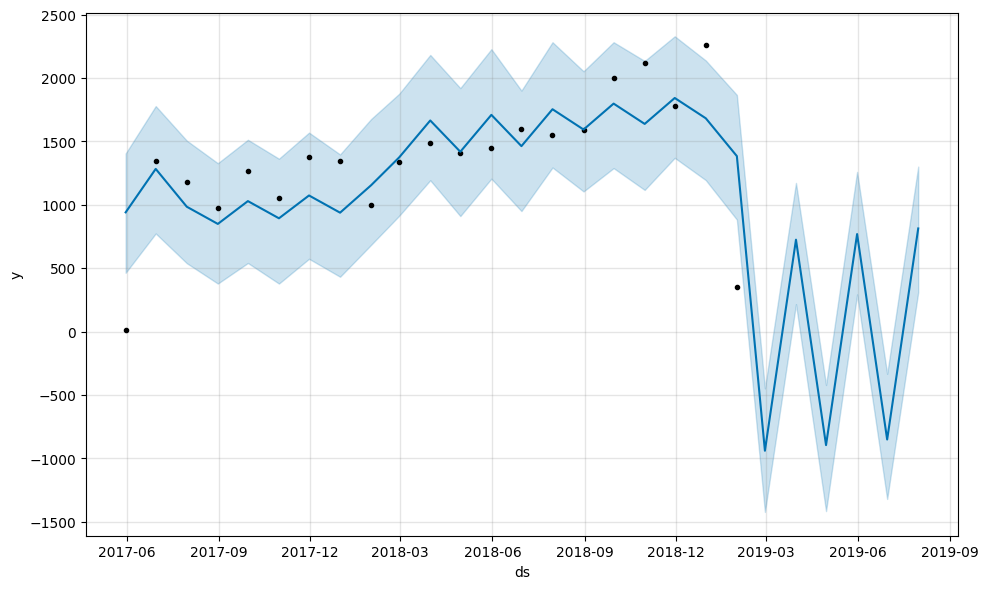

In [21]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Initialize Prophet
model = Prophet()

# Add monthly seasonality BEFORE fitting
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(monthly_demand)

# Predict next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(monthly_demand['y'], forecast['yhat'])
print(f"📊 Mean Absolute Error: {mae:.2f}")

ValueError: Found input variables with inconsistent numbers of samples: [21, 27]

In [23]:
print("Actual demand size:", monthly_demand.shape[0])
print("Forecast size:", forecast.shape[0])

Actual demand size: 21
Forecast size: 27


In [24]:
forecast_trimmed = forecast[['ds', 'yhat']].merge(monthly_demand, on='ds', how='inner')


In [25]:
from sklearn.metrics import mean_absolute_error

mae_updated = mean_absolute_error(forecast_trimmed['y'], forecast_trimmed['yhat'])
print(f"📊 Updated Mean Absolute Error: {mae_updated:.2f}")

📊 Updated Mean Absolute Error: 274.37


In [26]:
model = Prophet(changepoint_prior_scale=0.01)  # Try lower values (e.g., 0.008 or 0.005)
model.fit(monthly_demand)

14:16:46 - cmdstanpy - INFO - Chain [1] start processing
14:16:46 - cmdstanpy - INFO - Chain [1] done processing


14:16:47 - cmdstanpy - INFO - Chain [1] start processing
14:16:53 - cmdstanpy - INFO - Chain [1] done processing
S:\intership\inventory_forecasting_project\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


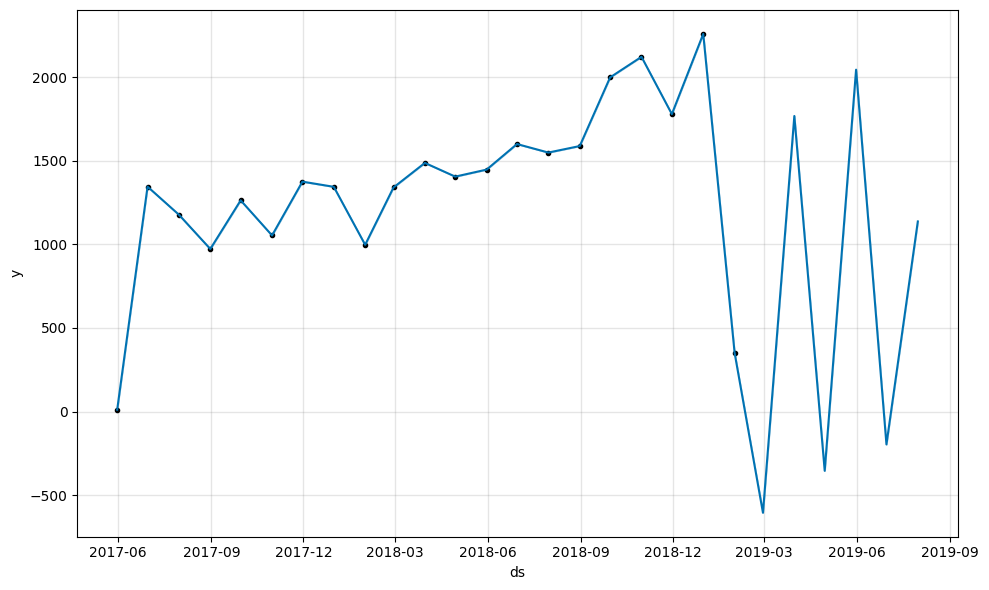

In [27]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Initialize Prophet model **before fitting**
model = Prophet(
    seasonality_mode='multiplicative',  
    yearly_seasonality=True,  
    changepoint_prior_scale=0.01  
)

# Add Monthly Seasonality **BEFORE training**
model.add_seasonality(name='monthly', period=30.5, fourier_order=10)

# Fit the model
model.fit(monthly_demand)

# Predict next 6 months
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

In [28]:
# Create a new Prophet model before fitting
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    changepoint_prior_scale=0.01
)

# Add Monthly Seasonality **BEFORE training**
model.add_seasonality(name='monthly', period=30.5, fourier_order=10)

# Now, fit the model
model.fit(monthly_demand)

14:16:57 - cmdstanpy - INFO - Chain [1] start processing
14:17:02 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
print(model.seasonalities)

OrderedDict({'monthly': {'period': 30.5, 'fourier_order': 10, 'prior_scale': 10.0, 'mode': 'multiplicative', 'condition_name': None}, 'yearly': {'period': 365.25, 'fourier_order': 10, 'prior_scale': 10.0, 'mode': 'multiplicative', 'condition_name': None}})


In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE manually
mse = mean_squared_error(forecast_trimmed['y'], forecast_trimmed['yhat'])
rmse = np.sqrt(mse)

print(f"📊 RMSE: {rmse:.2f}")

📊 RMSE: 385.79


In [35]:
model = Prophet(changepoint_prior_scale=0.005)  # Try values between 0.003 and 0.008
model.fit(monthly_demand)

14:23:45 - cmdstanpy - INFO - Chain [1] start processing
14:23:45 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
print(model.seasonalities)

OrderedDict()


14:25:55 - cmdstanpy - INFO - Chain [1] start processing
14:26:01 - cmdstanpy - INFO - Chain [1] done processing
S:\intership\inventory_forecasting_project\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


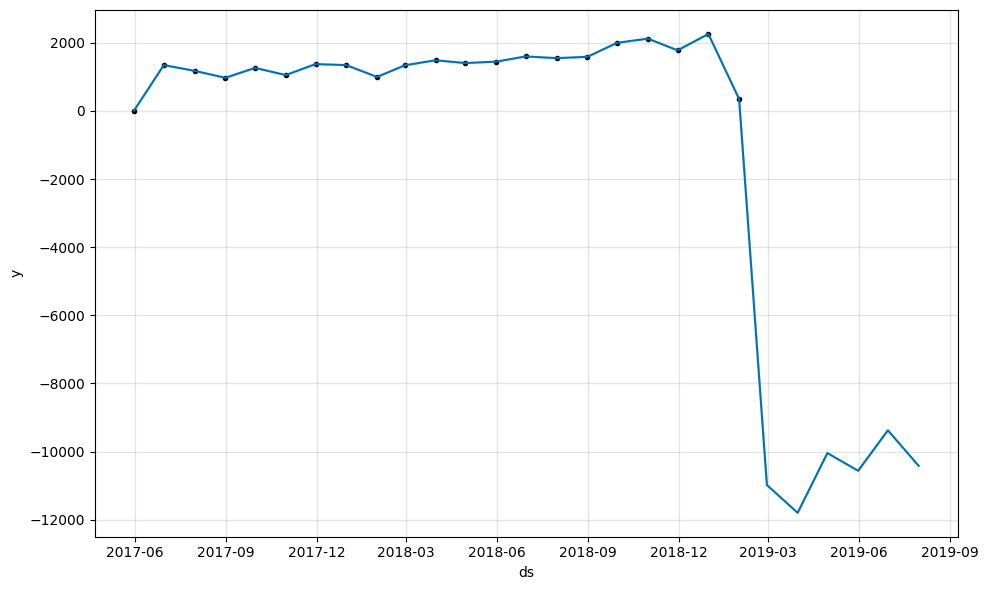

In [39]:
from prophet import Prophet
import matplotlib.pyplot as plt

# **Create a fresh Prophet model before fitting**
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    changepoint_prior_scale=0.005  # Lower values prevent overfitting
)

# **Add Monthly Seasonality BEFORE training**
model.add_seasonality(name='monthly', period=30.5, fourier_order=20)

# **Now fit the model on your dataset**
model.fit(monthly_demand)

# **Generate forecasts**
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# **Plot the forecast**
model.plot(forecast)
plt.show()

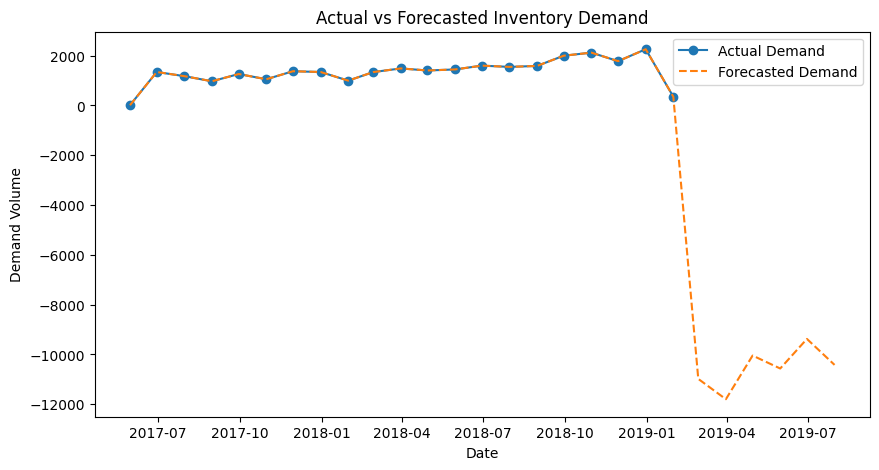

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_demand['ds'], monthly_demand['y'], label="Actual Demand", marker="o")
plt.plot(forecast['ds'], forecast['yhat'], label="Forecasted Demand", linestyle="dashed")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Demand Volume")
plt.title("Actual vs Forecasted Inventory Demand")
plt.show()

S:\intership\inventory_forecasting_project\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


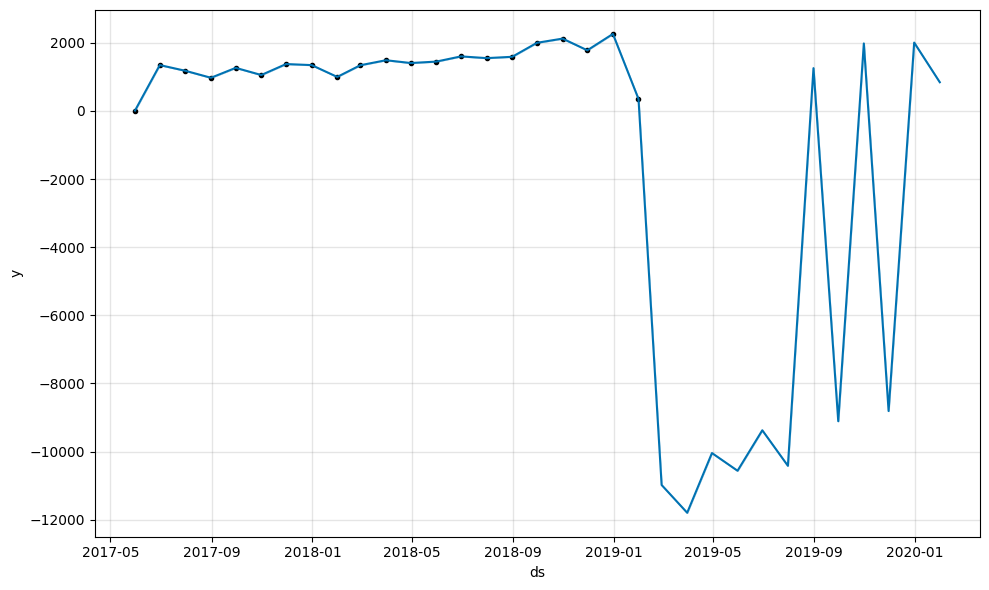

In [41]:
future_long = model.make_future_dataframe(periods=12, freq='M')
forecast_long = model.predict(future_long)

model.plot(forecast_long)
plt.show()


In [42]:
model = Prophet(changepoint_prior_scale=0.005)  # Lower values smoothen trends

In [43]:
future_scenario = model.make_future_dataframe(periods=12, freq='M')

# Example: Simulating higher seasonal demand
forecast_scenario = model.predict(future_scenario)

model.plot(forecast_scenario)
plt.show()

Exception: Model has not been fit.

In [44]:
model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    changepoint_prior_scale=0.005
)

# Ensure Monthly Seasonality is added BEFORE fitting
model.add_seasonality(name='monthly', period=30.5, fourier_order=20)

# Now, fit the model
model.fit(monthly_demand)

14:29:49 - cmdstanpy - INFO - Chain [1] start processing
14:29:55 - cmdstanpy - INFO - Chain [1] done processing


S:\intership\inventory_forecasting_project\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


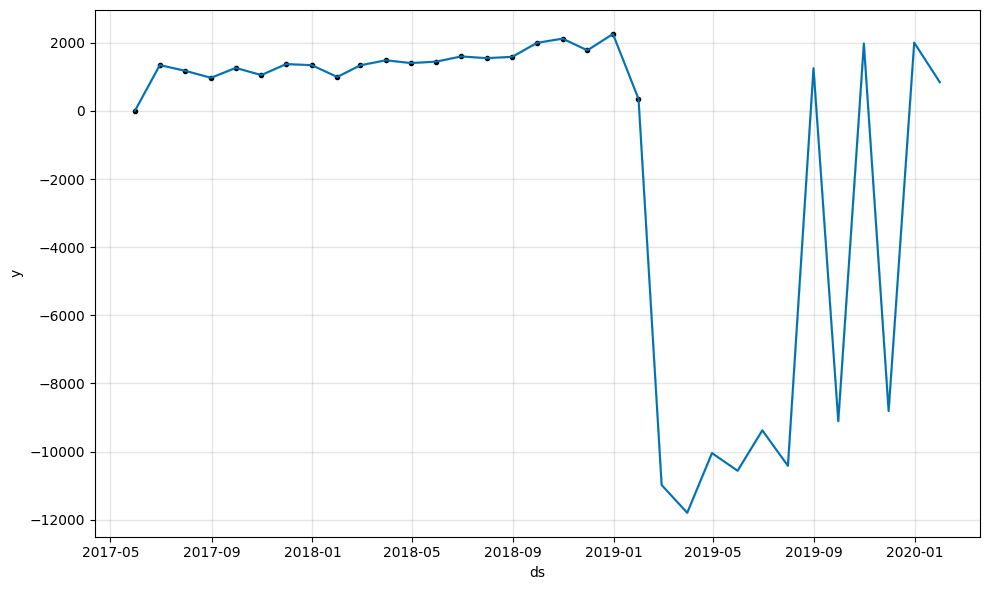

In [45]:
future_scenario = model.make_future_dataframe(periods=12, freq='M')
forecast_scenario = model.predict(future_scenario)

# Plot forecast results
model.plot(forecast_scenario)
plt.show()

In [47]:
!pip install schedule

In [ ]:
import schedule
import time
import threading

def run_forecast():
    future_update = model.make_future_dataframe(periods=6, freq='M')
    forecast_update = model.predict(future_update)
    print("🔄 Forecast Updated!")

# Schedule forecast updates
schedule.every().week.do(run_forecast)

# Run scheduling in a background thread
def background_scheduler():
    while True:
        schedule.run_pending()
        time.sleep(60)  # Wait 1 minute before checking again

# Start the scheduler in a separate thread
thread = threading.Thread(target=background_scheduler, daemon=True)
thread.start()